In [53]:
#Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style

from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
analyzer = SentimentIntensityAnalyzer()


In [54]:
newsHouses  = ("@BBCNews", "@CBSNews", "@CNNnewsroom", "@FoxNews", "@nytimes")


In [55]:
#array for sentiments 
sentiments = []
numTweets= 100

In [56]:
for media in newsHouses:
    counter = 1
    # Get all tweets from home feed
    newsTweets = api.user_timeline(media, count= numTweets)

    # Loop through all tweets 
    for tweet in newsTweets:

        # Print Tweets
        print("Tweet %s: %s" % (counter, tweet["text"]))
      
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweetsAgo = counter
        
        # Add sentiments for each tweet into an array
        sentiments.append({"Date": tweet["created_at"], 
                           "Source": media,
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neg,
                           "Neutral": neu,
                           "Text": tweet['text'],
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1

Tweet 1: RT @BBCNormanS: Jeremy Corbyn says Syrian bombing “legally questionable”
Tweet 2: RT @bbc5live: “The international community cannot stand by and do nothing otherwise we risk normalising the use of chemical weapons.”

Labo…
Tweet 3: RT @bbc5live: “A failure of leadership”

The SNP’s defence spokesman, Stewart McDonald reacts to the #SyriaStrikes

#5liveBreakfast https:/…
Tweet 4: Follow the latest developments &amp; analysis following the #SyriaStrikes

https://t.co/lIEOP7kV3d https://t.co/5hgV7JnZ9Q
Tweet 5: Commonwealth Games: England beat Jamaica to reach final for first time https://t.co/q1f9p8EVrR
Tweet 6: Edinburgh march for vote on final Brexit deal https://t.co/wAhijOOHrT
Tweet 7: Will Gompertz reviews Monet and Architecture at London's National Gallery ★★★★☆ https://t.co/361AJoLUEj
Tweet 8: 'Twisting pupil's ears' Nene Park Academy teacher struck off https://t.co/9LjW3l5Zl2
Tweet 9: Northern Fiction Alliance says publishing industry should move north https://t.co/A1Dj5

Tweet 1: Earlier Friday, U.S. Ambassador to the UN Nikki Haley accused Russia of allowing chemical weapons use in Syria… https://t.co/xxJoacrVVI
Tweet 2: Three strike target areas included a scientific research center in Damascus, a chemical weapons storage facility we… https://t.co/pLrRGkubUO
Tweet 3: PHOTO: Damascus skies erupt with anti-aircraft fire as U.S. launches precision strikes, targeting different parts o… https://t.co/MqKq2FNjbZ
Tweet 4: "To Iran and Russia, I ask, what kind of nation wants to be associated with the mass murder of innocent men, women… https://t.co/5I454tWYH9
Tweet 5: British Prime Minister Theresa May announced she authorized her country's forces to conduct "precision strikes" alo… https://t.co/BVZlN8pkiA
Tweet 6: "And we are also hearing reports, many of the targets, in particular the air bases in some of the military installa… https://t.co/kdBU2fyoAN
Tweet 7: .@sethdoane: "People [in Damascus] telling us they didn't really believe that Pres. Trump would f

Tweet 1: Exclusive: Deputy Attorney General Rod Rosenstein has discussed with a DOJ ethics official whether he should recuse… https://t.co/6zaDjEATcL
Tweet 2: Democratic Rep. Steve Cohen argues that President Trump's pardoning of Scooter Libby telegraphs "what he'll probabl… https://t.co/6kD7ls6bN3
Tweet 3: RT @CNN: BREAKING: President Trump pardons Scooter Libby, who was the chief of staff to Vice President Dick Cheney. Libby had been convicte…
Tweet 4: Merriam-Webster dictionary says it's seen a 60,000% spike in searches for the definition of 'slimeball' after Presi… https://t.co/v3ZbzBOGXP
Tweet 5: RT @CNNPolitics: US Ambassador to the UN Nikki Haley slams Russia in the wake of a suspected chemical attack in Syria: "It is Russia alone…
Tweet 6: "The FBI should not be in the business of making political calculations" says Robby Mook, Hillary Clinton's former… https://t.co/jihfeuevXc
Tweet 7: Democratic Rep. Denny Heck says Trump firing Rosenstein in order to shut down the Russia prob

Tweet 1: Russian officials warn of 'consequences' after US-led airstrikes on Syria https://t.co/RGjjYWVAqt https://t.co/Jhye7cIKs4
Tweet 2: Gen. Joseph Dunford: "We specifically identified these targets to mitigate the risk of Russian forces being involve… https://t.co/ayi9u5rizk
Tweet 3: US warships,  B-1 bombers strike against Assad after suspected chemical attack https://t.co/89N0xBTaeL https://t.co/PHcUE6Gw4T
Tweet 4: Largest Syrian-American group hails Trump after military action https://t.co/nuVzcU3UlA
Tweet 5: .@POTUS: "The purpose of our actions tonight is to establish a strong deterrent against the production, spread, and… https://t.co/A48DCDMud9
Tweet 6: Tune in to Fox News Channel NOW for special live coverage of the military strikes in Syria. https://t.co/cxFCrtaxsJ
Tweet 7: .@michaelgwaltz: "The Syrians are armed and particularly their military is largely aligned with Russia both tactica… https://t.co/pj4LetAg4S
Tweet 8: Russian officials warn of 'consequences' after US-le

Tweet 1: The whale had 64 pounds of trash — plastic bags, ropes, netting and even a plastic drum — clogging its intestines a… https://t.co/dx3q1miHIg
Tweet 2: A Moscow court cleared the way for the government to ban Telegram, the messaging app, over its failure to give Russ… https://t.co/9MQBkwVyym
Tweet 3: RT @EllenBarryNYT: Russia has been researching the use of nerve agents smeared on door handles as tools in state-sponsored killing, says Br…
Tweet 4: The airstrikes hit 3 of Assad’s chemical weapons facilities in Syria, the U.S. says https://t.co/Axs6h0aOd1 https://t.co/4MlUwWLZgZ
Tweet 5: Angel, 23, suffers from a medical condition that causes excruciating pain throughout her body. Doctors don’t have a… https://t.co/Z2yy5iNM27
Tweet 6: When Syria’s civil war began in 2011, the UN and others tallied the numbers killed in the conflict. 7 years on, an… https://t.co/EdtqeG49dj
Tweet 7: 300 meters in Gaza: Snipers, burning tires and a contested fence https://t.co/NJW6Vgjh4e
Tweet 8: One

In [57]:
#put sentiments data into DataFrame 
sentimentsDf = pd.DataFrame.from_dict(sentiments)
sentimentsDf.to_csv("tweetsNews.csv", encoding= 'utf-8', index = False)
sentimentsDf.head(10)

,Compound,Date,Negative,Neutral,Positive,Source,Text,Tweets Ago
0,0.0000,Sat Apr 14 07:52:26 +0000 2018,0.000,1.000,0.000,@BBCNews,RT @BBCNormanS: Jeremy Corbyn says Syrian bomb...,1
1,0.2057,Sat Apr 14 07:50:44 +0000 2018,0.000,0.917,0.083,@BBCNews,RT @bbc5live: “The international community can...,2
2,-0.4404,Sat Apr 14 07:50:20 +0000 2018,0.159,0.773,0.068,@BBCNews,RT @bbc5live: “A failure of leadership”\n\nThe...,3
3,0.0000,Sat Apr 14 07:45:34 +0000 2018,0.000,1.000,0.000,@BBCNews,Follow the latest developments &amp; analysis ...,4
4,0.0258,Sat Apr 14 07:21:46 +0000 2018,0.000,0.909,0.091,@BBCNews,Commonwealth Games: England beat Jamaica to re...,5
5,0.0000,Sat Apr 14 07:18:57 +0000 2018,0.000,1.000,0.000,@BBCNews,Edinburgh march for vote on final Brexit deal ...,6
6,0.0000,Sat Apr 14 07:16:24 +0000 2018,0.000,1.000,0.000,@BBCNews,Will Gompertz reviews Monet and Architecture a...,7
7,-0.2500,Sat Apr 14 07:16:24 +0000 2018,0.182,0.818,0.000,@BBCNews,'Twisting pupil's ears' Nene Park Academy teac...,8
8,0.0000,Sat Apr 14 07:02:42 +0000 2018,0.000,1.000,0.000,@BBCNews,Northern Fiction Alliance says publishing indu...,9
9,-0.2023,Sat Apr 14 07:02:42 +0000 2018,0.184,0.816,0.000,@BBCNews,Five things to do with empty retail space http...,10


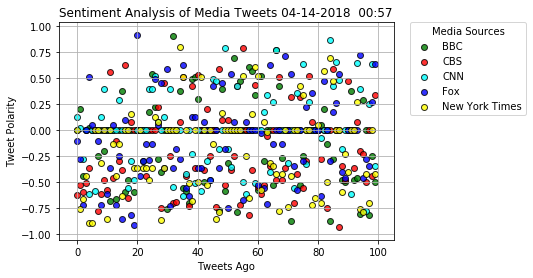

In [59]:
colors = ['green','red','cyan','blue','yellow']
looper = np.arange(0,len(newsHouses))  

#scatter plot of the tweets sentiment analysis using dataframe sorted by time of tweet 
for i in looper:
    newsChannel = sentimentsDf.loc[sentimentsDf["Source"] == newsHouses[i]]
    newsChannel = newsChannel.sort_values("Tweets Ago")
    plt.scatter(np.arange(len(newsChannel["Compound"])), newsChannel['Compound'],
            color = colors[i], marker="o", alpha=0.8, linewidths=1, edgecolor="black", label= newsHouses[i]) 
    
now = datetime.now().strftime("%m-%d-%Y  %H:%M")
plt.title("Sentiment Analysis of Media Tweets " + now)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.grid(True)

L = plt.legend(bbox_to_anchor=(1.05,1),title="Media Sources", loc= 2, borderaxespad = 0.)
L.get_texts()[0].set_text('BBC')
L.get_texts()[1].set_text('CBS')
L.get_texts()[2].set_text('CNN')
L.get_texts()[3].set_text('Fox')
L.get_texts()[4].set_text('New York Times')

plt.savefig("ScatterPlotNewsTweets.png")

plt.show()

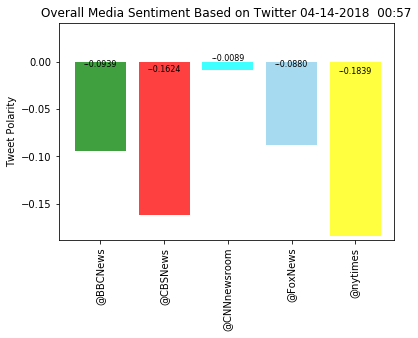

In [60]:
#bar plot of the tweets sentiment analysis using dataframe sorted by time of tweet 
newsMediaTweets = {}

for i in looper:
    newsChannel = sentimentsDf.loc[sentimentsDf["Source"] == newsHouses[i]]
    newsMediaTweets[newsHouses[i]] = newsChannel["Compound"].mean()
    
ind = np.arange(len(newsHouses))
width = 0.35
fig, ax = plt.subplots()    
now = datetime.now().strftime("%m-%d-%Y  %H:%M")
ticks = []

plt.title("Overall Media Sentiment Based on Twitter " + now)
plt.ylabel("Tweet Polarity")
plt.xlim(-0.25, len(newsHouses))
plt.ylim(min(newsMediaTweets.values()) - .005, max(newsMediaTweets.values()) + .05)

for i in ind:
    ticks.append(i + 0.4)

colors = ['green','red','cyan','skyblue','yellow']

#add labels, title and axes ticks
plt.xticks(ticks, newsMediaTweets, rotation= "vertical")
barPlot = plt.bar(ind, newsMediaTweets.values(), color = colors, alpha=0.75, align="edge")

def autolabel(rects, xpos='center'):
    """Attach a text label above each bar displaying its height"""
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .08*height,
                 '-%.4f' % float(height),
                ha='center', va='bottom', fontsize=8)

autolabel(barPlot, "center")

plt.show()
